<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/use_Unet_and_class_weighting_more_data_CNN_pixel_segmentation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN for Pixel segmentation**

In [ ]:
# %rm -rf '/content/data'

In [1]:
# !pip install -r requirements.txt

In [1]:
! pip install -q git+https://github.com/tensorflow/examples.git --quiet

  Preparing metadata (setup.py) ... done


In [2]:
# Importing Libraries
import zipfile
import os
from PIL import Image
import numpy as np
from skimage import img_as_ubyte
from scipy.spatial.distance import cdist
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Softmax
import matplotlib.pyplot as plt

# Unzipping and Defining Directories

*   train image
      * image1
      * image2 ...
*   train mask image
      * mask1
      * mask2 ...
*   test image
      * test_image
*   test mask image
      * test_mask


In [4]:
# Unzipping and Defining Directories
zip_path = '/content/data.zip'
unzip_dir = '/content'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)
data_dir = os.path.join(unzip_dir, 'data')
# train_dir = os.path.join(data_dir, 'train')
# masks_dir = os.path.join(data_dir, 'masks')
# test_dir = os.path.join(data_dir, 'test')
# test_masks_dir = os.path.join(data_dir, 'test_mask')

# Mapping of RGB Colors to Class Labels and Conversion Function

In [172]:
# Mapping of RGB colors to class labels
class_colors = np.array([
    [0, 0, 0],    # Black
    [255, 0, 0],  # Red
    [0, 255, 0],  # Green
    [0, 0, 255]   # Blue
])

# Function to convert mask image to class labels
def convert_mask_to_labels(mask_image):
    display(mask_image.shape)
    mask_labels = np.zeros(mask_image.shape[:2], dtype=np.uint8)
    mask_image = mask_image[:, :, :3]
    for i in range(mask_image.shape[0]):
        for j in range(mask_image.shape[1]):
            distances = cdist([mask_image[i, j]], class_colors, 'euclidean')
            class_label = np.argmin(distances)
            mask_labels[i, j] = class_label  ## the output example class_label 0 class_label 0 class_label 0
    return mask_labels

# Loading Images and Masks

In [173]:
# Loading images and masks
def load_images_and_masks(image_dir, mask_dir, is_test=False):
    images = []
    masks = []
    for image_name in tqdm(os.listdir(image_dir)):
      print(image_name)
      image_path = os.path.join(image_dir, image_name)
      if image_path != '/content/data/train/.ipynb_checkpoints' and  image_path != '/content/data/test/.ipynb_checkpoints':
        mask_name = "test_mask.JPG" if is_test else "mask" + image_name[5:]
        mask_path = os.path.join(mask_dir, mask_name)

        # Load image and mask
        image = Image.open(image_path)
        mask_image = Image.open(mask_path)

        # Convert mask image to class labels
        mask_labels = convert_mask_to_labels(np.array(mask_image))
        images.append(img_as_ubyte(image))
        masks.append(mask_labels)

    return np.array(images), np.array(masks)

train_dir = "/content/data/train"
masks_dir = "/content/data/masks"
test_dir = "/content/data/test"
test_masks_dir = "/content/data/test_mask"


# Loading Training and Test Datasets

In [174]:
qwe = np.array(Image.open("/content/data/masks/mask1.JPG"))
qwe.shape

(990, 1060, 4)

In [175]:
qwe = np.array(Image.open("/content/data/test_mask/test_mask.JPG"))
qwe.shape

(990, 1060, 4)

In [176]:
# # Loading training and test datasets
train_images, train_masks = load_images_and_masks(train_dir, masks_dir)
test_images, test_masks = load_images_and_masks(test_dir, test_masks_dir, is_test=True)

  0%|          | 0/10 [00:00<?, ?it/s]

image3.JPG


(990, 1060, 4)

 10%|█         | 1/10 [00:09<01:26,  9.56s/it]

image10.JPG


(990, 1060, 4)

 20%|██        | 2/10 [00:20<01:22, 10.27s/it]

image8.JPG


(990, 1060, 4)

 30%|███       | 3/10 [00:31<01:13, 10.52s/it]

image1.JPG


(990, 1060, 4)

 40%|████      | 4/10 [00:41<01:03, 10.60s/it]

image2.JPG


(990, 1060, 4)

 50%|█████     | 5/10 [00:52<00:53, 10.73s/it]

image4.JPG


(990, 1060, 4)

 60%|██████    | 6/10 [01:03<00:43, 10.87s/it]

image6.JPG


(990, 1060, 4)

 70%|███████   | 7/10 [01:13<00:31, 10.47s/it]

image7.JPG


(990, 1060, 4)

 80%|████████  | 8/10 [01:24<00:21, 10.54s/it]

image5.JPG


(990, 1060, 4)

 90%|█████████ | 9/10 [01:35<00:10, 10.61s/it]

image9.JPG


(990, 1060, 4)

  0%|          | 0/2 [00:00<?, ?it/s]

test_image.JPG


(990, 1060, 4)

100%|██████████| 2/2 [00:10<00:00,  5.37s/it]

.ipynb_checkpoints


In [177]:
add_colors = lambda x: class_colors[x].astype(dtype=np.uint8)

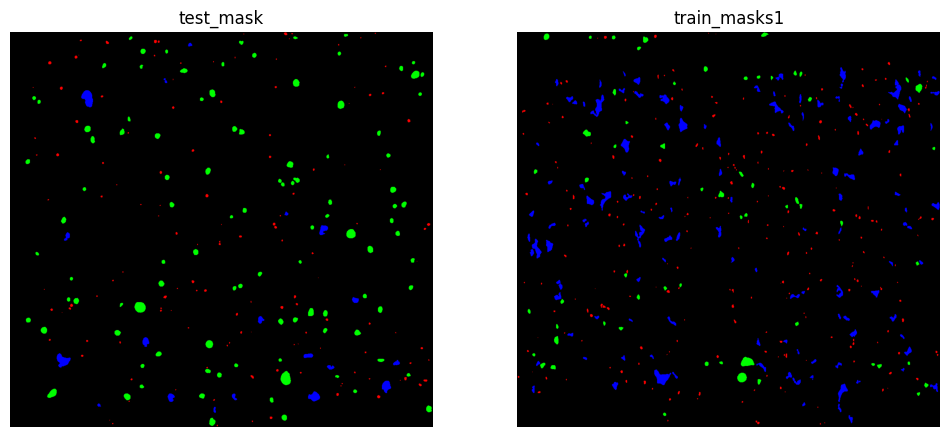

In [178]:
# Plotting Original and Predicted Images
fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].imshow(add_colors(test_masks[0]))
ax[0].set_title("test_mask")
ax[0].axis('off')

ax[1].imshow(add_colors(train_masks[0]))
ax[1].set_title("train_masks1")
ax[1].axis('off')
# ax[2].imshow(train_masks[1])
# ax[2].set_title("train_masks2")
# ax[2].axis('off')
plt.show()

# Building the CNN Model

# Reshaping Masks for Training and Training the Model

In [179]:
def normalize(x):
    # Please note that there is the similar function in Sklearn also
    return (x-np.min(x))/(np.max(x)-np.min(x))

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.3203

10/10 [==============================] - 6s 137ms/step - loss: 0.0225 - accuracy: 0.3203
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.0618

10/10 [==============================] - 1s 135ms/step - loss: 0.0103 - accuracy: 0.0618
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.0125

10/10 [==============================] - 1s 151ms/step - loss: 0.0091 - accuracy: 0.0125
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.0128

10/10 [==============================] - 2s 148ms/step - loss: 0.0085 - accuracy: 0.0128
Epoch 5/100
10/10 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.0135

10/10 [==============================] - 1s 143ms/step - loss: 0.0079 - accuracy: 0.0135
Epoch 6/100
10/10 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.0213

10/10 [==============================] - 1s 152ms/step - loss: 0.0075 - accuracy: 0.0213
Epoch 7/100
10/10 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.0484

10/10 [==============================] - 2s 223ms/step - loss: 0.0069 - accuracy: 0.0484
Epoch 8/100
10/10 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.0658

10/10 [==============================] - 2s 178ms/step - loss: 0.0064 - accuracy: 0.0658
Epoch 9/100
10/10 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.0853

10/10 [==============================] - 1s 146ms/step - loss: 0.0058 - accuracy: 0.0853
Epoch 10/100
10/10 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.0909

10/10 [==============================] - 1s 148ms/step - loss: 0.0055 - accuracy: 0.0909
Epoch 11/100
10/10 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.1068

10/10 [==============================] - 1s 148ms/step - loss: 0.0049 - accuracy: 0.1068
Epoch 12/100
10/10 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.1309

10/10 [==============================] - 1s 137ms/step - loss: 0.0042 - accuracy: 0.1309
Epoch 13/100
10/10 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.1643

10/10 [==============================] - 2s 157ms/step - loss: 0.0036 - accuracy: 0.1643
Epoch 14/100
10/10 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.1919

10/10 [==============================] - 2s 150ms/step - loss: 0.0031 - accuracy: 0.1919
Epoch 15/100
10/10 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.2258

10/10 [==============================] - 2s 223ms/step - loss: 0.0026 - accuracy: 0.2258
Epoch 16/100
10/10 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.2716

10/10 [==============================] - 2s 186ms/step - loss: 0.0023 - accuracy: 0.2716
Epoch 17/100
10/10 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.3118

10/10 [==============================] - 2s 152ms/step - loss: 0.0020 - accuracy: 0.3118
Epoch 18/100
10/10 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.3685

10/10 [==============================] - 1s 125ms/step - loss: 0.0017 - accuracy: 0.3685
Epoch 19/100
10/10 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.4316

10/10 [==============================] - 1s 124ms/step - loss: 0.0015 - accuracy: 0.4316
Epoch 20/100
10/10 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.4585

10/10 [==============================] - 1s 140ms/step - loss: 0.0013 - accuracy: 0.4585
Epoch 21/100
10/10 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.4791

10/10 [==============================] - 1s 148ms/step - loss: 0.0011 - accuracy: 0.4791
Epoch 22/100
10/10 [==============================] - ETA: 0s - loss: 9.4493e-04 - accuracy: 0.5115

10/10 [==============================] - 2s 154ms/step - loss: 9.4493e-04 - accuracy: 0.5115
Epoch 23/100
10/10 [==============================] - ETA: 0s - loss: 8.1582e-04 - accuracy: 0.5474

10/10 [==============================] - 2s 161ms/step - loss: 8.1582e-04 - accuracy: 0.5474
Epoch 24/100
10/10 [==============================] - ETA: 0s - loss: 6.6297e-04 - accuracy: 0.5684

10/10 [==============================] - 2s 212ms/step - loss: 6.6297e-04 - accuracy: 0.5684
Epoch 25/100
10/10 [==============================] - ETA: 0s - loss: 5.7151e-04 - accuracy: 0.5799

10/10 [==============================] - 1s 142ms/step - loss: 5.7151e-04 - accuracy: 0.5799
Epoch 26/100
10/10 [==============================] - ETA: 0s - loss: 4.7817e-04 - accuracy: 0.6105

10/10 [==============================] - 1s 146ms/step - loss: 4.7817e-04 - accuracy: 0.6105
Epoch 27/100
10/10 [==============================] - ETA: 0s - loss: 4.1503e-04 - accuracy: 0.6465

10/10 [==============================] - 1s 130ms/step - loss: 4.1503e-04 - accuracy: 0.6465
Epoch 28/100
10/10 [==============================] - ETA: 0s - loss: 3.6441e-04 - accuracy: 0.6809

10/10 [==============================] - 1s 135ms/step - loss: 3.6441e-04 - accuracy: 0.6809
Epoch 29/100
10/10 [==============================] - ETA: 0s - loss: 3.2707e-04 - accuracy: 0.7136

10/10 [==============================] - 1s 144ms/step - loss: 3.2707e-04 - accuracy: 0.7136
Epoch 30/100
10/10 [==============================] - ETA: 0s - loss: 2.9026e-04 - accuracy: 0.7519

10/10 [==============================] - 1s 130ms/step - loss: 2.9026e-04 - accuracy: 0.7519
Epoch 31/100
10/10 [==============================] - ETA: 0s - loss: 2.6653e-04 - accuracy: 0.7790

10/10 [==============================] - 1s 145ms/step - loss: 2.6653e-04 - accuracy: 0.7790
Epoch 32/100
10/10 [==============================] - ETA: 0s - loss: 2.4242e-04 - accuracy: 0.8006

10/10 [==============================] - 2s 180ms/step - loss: 2.4242e-04 - accuracy: 0.8006
Epoch 33/100
10/10 [==============================] - ETA: 0s - loss: 2.2746e-04 - accuracy: 0.8136

10/10 [==============================] - 2s 214ms/step - loss: 2.2746e-04 - accuracy: 0.8136
Epoch 34/100
10/10 [==============================] - ETA: 0s - loss: 2.0821e-04 - accuracy: 0.8294

10/10 [==============================] - 1s 129ms/step - loss: 2.0821e-04 - accuracy: 0.8294
Epoch 35/100
10/10 [==============================] - ETA: 0s - loss: 1.9201e-04 - accuracy: 0.8457

10/10 [==============================] - 1s 131ms/step - loss: 1.9201e-04 - accuracy: 0.8457
Epoch 36/100
10/10 [==============================] - ETA: 0s - loss: 1.7894e-04 - accuracy: 0.8598

10/10 [==============================] - 1s 126ms/step - loss: 1.7894e-04 - accuracy: 0.8598
Epoch 37/100
10/10 [==============================] - ETA: 0s - loss: 1.6678e-04 - accuracy: 0.8721

10/10 [==============================] - 1s 147ms/step - loss: 1.6678e-04 - accuracy: 0.8721
Epoch 38/100
10/10 [==============================] - ETA: 0s - loss: 1.5643e-04 - accuracy: 0.8820

10/10 [==============================] - 1s 128ms/step - loss: 1.5643e-04 - accuracy: 0.8820
Epoch 39/100
10/10 [==============================] - ETA: 0s - loss: 1.4711e-04 - accuracy: 0.8896

10/10 [==============================] - 1s 125ms/step - loss: 1.4711e-04 - accuracy: 0.8896
Epoch 40/100
10/10 [==============================] - ETA: 0s - loss: 1.3847e-04 - accuracy: 0.8949

10/10 [==============================] - 1s 131ms/step - loss: 1.3847e-04 - accuracy: 0.8949
Epoch 41/100
10/10 [==============================] - ETA: 0s - loss: 1.3012e-04 - accuracy: 0.9010

10/10 [==============================] - 2s 166ms/step - loss: 1.3012e-04 - accuracy: 0.9010
Epoch 42/100
10/10 [==============================] - ETA: 0s - loss: 1.2272e-04 - accuracy: 0.9068

10/10 [==============================] - 2s 203ms/step - loss: 1.2272e-04 - accuracy: 0.9068
Epoch 43/100
10/10 [==============================] - ETA: 0s - loss: 1.1643e-04 - accuracy: 0.9117

10/10 [==============================] - 1s 140ms/step - loss: 1.1643e-04 - accuracy: 0.9117
Epoch 44/100
10/10 [==============================] - ETA: 0s - loss: 1.1201e-04 - accuracy: 0.9164

10/10 [==============================] - 1s 129ms/step - loss: 1.1201e-04 - accuracy: 0.9164
Epoch 45/100
10/10 [==============================] - ETA: 0s - loss: 1.0793e-04 - accuracy: 0.9207

10/10 [==============================] - 1s 126ms/step - loss: 1.0793e-04 - accuracy: 0.9207
Epoch 46/100
10/10 [==============================] - ETA: 0s - loss: 1.0339e-04 - accuracy: 0.9218

10/10 [==============================] - 1s 128ms/step - loss: 1.0339e-04 - accuracy: 0.9218
Epoch 47/100
10/10 [==============================] - ETA: 0s - loss: 9.7448e-05 - accuracy: 0.9249

10/10 [==============================] - 1s 125ms/step - loss: 9.7448e-05 - accuracy: 0.9249
Epoch 48/100
10/10 [==============================] - ETA: 0s - loss: 9.2741e-05 - accuracy: 0.9300

10/10 [==============================] - 1s 130ms/step - loss: 9.2741e-05 - accuracy: 0.9300
Epoch 49/100
10/10 [==============================] - ETA: 0s - loss: 8.8336e-05 - accuracy: 0.9330

10/10 [==============================] - 1s 127ms/step - loss: 8.8336e-05 - accuracy: 0.9330
Epoch 50/100
10/10 [==============================] - ETA: 0s - loss: 8.4321e-05 - accuracy: 0.9365

10/10 [==============================] - 1s 130ms/step - loss: 8.4321e-05 - accuracy: 0.9365
Epoch 51/100
10/10 [==============================] - ETA: 0s - loss: 8.0599e-05 - accuracy: 0.9391

10/10 [==============================] - 2s 203ms/step - loss: 8.0599e-05 - accuracy: 0.9391
Epoch 52/100
10/10 [==============================] - ETA: 0s - loss: 7.7235e-05 - accuracy: 0.9418

10/10 [==============================] - 2s 176ms/step - loss: 7.7235e-05 - accuracy: 0.9418
Epoch 53/100
10/10 [==============================] - ETA: 0s - loss: 7.4000e-05 - accuracy: 0.9444

10/10 [==============================] - 1s 125ms/step - loss: 7.4000e-05 - accuracy: 0.9444
Epoch 54/100
10/10 [==============================] - ETA: 0s - loss: 7.0865e-05 - accuracy: 0.9457

10/10 [==============================] - 1s 131ms/step - loss: 7.0865e-05 - accuracy: 0.9457
Epoch 55/100
10/10 [==============================] - ETA: 0s - loss: 6.7811e-05 - accuracy: 0.9484

10/10 [==============================] - 1s 130ms/step - loss: 6.7811e-05 - accuracy: 0.9484
Epoch 56/100
10/10 [==============================] - ETA: 0s - loss: 6.5505e-05 - accuracy: 0.9507

10/10 [==============================] - 1s 139ms/step - loss: 6.5505e-05 - accuracy: 0.9507
Epoch 57/100
10/10 [==============================] - ETA: 0s - loss: 6.2844e-05 - accuracy: 0.9526

10/10 [==============================] - 1s 133ms/step - loss: 6.2844e-05 - accuracy: 0.9526
Epoch 58/100
10/10 [==============================] - ETA: 0s - loss: 6.0651e-05 - accuracy: 0.9538

10/10 [==============================] - 1s 129ms/step - loss: 6.0651e-05 - accuracy: 0.9538
Epoch 59/100
10/10 [==============================] - ETA: 0s - loss: 5.8728e-05 - accuracy: 0.9551

10/10 [==============================] - 1s 127ms/step - loss: 5.8728e-05 - accuracy: 0.9551
Epoch 60/100
10/10 [==============================] - ETA: 0s - loss: 5.6451e-05 - accuracy: 0.9575

10/10 [==============================] - 2s 184ms/step - loss: 5.6451e-05 - accuracy: 0.9575
Epoch 61/100
10/10 [==============================] - ETA: 0s - loss: 5.4688e-05 - accuracy: 0.9595

10/10 [==============================] - 2s 194ms/step - loss: 5.4688e-05 - accuracy: 0.9595
Epoch 62/100
10/10 [==============================] - ETA: 0s - loss: 5.2767e-05 - accuracy: 0.9610

10/10 [==============================] - 1s 130ms/step - loss: 5.2767e-05 - accuracy: 0.9610
Epoch 63/100
10/10 [==============================] - ETA: 0s - loss: 5.1271e-05 - accuracy: 0.9615

10/10 [==============================] - 1s 130ms/step - loss: 5.1271e-05 - accuracy: 0.9615
Epoch 64/100
10/10 [==============================] - ETA: 0s - loss: 4.9637e-05 - accuracy: 0.9624

10/10 [==============================] - 1s 129ms/step - loss: 4.9637e-05 - accuracy: 0.9624
Epoch 65/100
10/10 [==============================] - ETA: 0s - loss: 4.9497e-05 - accuracy: 0.9636

10/10 [==============================] - 1s 127ms/step - loss: 4.9497e-05 - accuracy: 0.9636
Epoch 66/100
10/10 [==============================] - ETA: 0s - loss: 4.7360e-05 - accuracy: 0.9645

10/10 [==============================] - 1s 126ms/step - loss: 4.7360e-05 - accuracy: 0.9645
Epoch 67/100
10/10 [==============================] - ETA: 0s - loss: 4.5322e-05 - accuracy: 0.9658

10/10 [==============================] - 1s 126ms/step - loss: 4.5322e-05 - accuracy: 0.9658
Epoch 68/100
10/10 [==============================] - ETA: 0s - loss: 4.3812e-05 - accuracy: 0.9668

10/10 [==============================] - 1s 130ms/step - loss: 4.3812e-05 - accuracy: 0.9668
Epoch 69/100
10/10 [==============================] - ETA: 0s - loss: 4.2197e-05 - accuracy: 0.9685

10/10 [==============================] - 1s 147ms/step - loss: 4.2197e-05 - accuracy: 0.9685
Epoch 70/100
10/10 [==============================] - ETA: 0s - loss: 4.0834e-05 - accuracy: 0.9693

10/10 [==============================] - 2s 212ms/step - loss: 4.0834e-05 - accuracy: 0.9693
Epoch 71/100
10/10 [==============================] - ETA: 0s - loss: 3.9596e-05 - accuracy: 0.9707

10/10 [==============================] - 2s 153ms/step - loss: 3.9596e-05 - accuracy: 0.9707
Epoch 72/100
10/10 [==============================] - ETA: 0s - loss: 3.8601e-05 - accuracy: 0.9718

10/10 [==============================] - 1s 132ms/step - loss: 3.8601e-05 - accuracy: 0.9718
Epoch 73/100
10/10 [==============================] - ETA: 0s - loss: 3.7475e-05 - accuracy: 0.9729

10/10 [==============================] - 1s 130ms/step - loss: 3.7475e-05 - accuracy: 0.9729
Epoch 74/100
10/10 [==============================] - ETA: 0s - loss: 3.6420e-05 - accuracy: 0.9735

10/10 [==============================] - 1s 145ms/step - loss: 3.6420e-05 - accuracy: 0.9735
Epoch 75/100
10/10 [==============================] - ETA: 0s - loss: 3.5513e-05 - accuracy: 0.9741

10/10 [==============================] - 1s 130ms/step - loss: 3.5513e-05 - accuracy: 0.9741
Epoch 76/100
10/10 [==============================] - ETA: 0s - loss: 3.4701e-05 - accuracy: 0.9748

10/10 [==============================] - 1s 127ms/step - loss: 3.4701e-05 - accuracy: 0.9748
Epoch 77/100
10/10 [==============================] - ETA: 0s - loss: 3.4011e-05 - accuracy: 0.9748

10/10 [==============================] - 1s 129ms/step - loss: 3.4011e-05 - accuracy: 0.9748
Epoch 78/100
10/10 [==============================] - ETA: 0s - loss: 3.3017e-05 - accuracy: 0.9760

10/10 [==============================] - 2s 168ms/step - loss: 3.3017e-05 - accuracy: 0.9760
Epoch 79/100
10/10 [==============================] - ETA: 0s - loss: 3.2274e-05 - accuracy: 0.9765

10/10 [==============================] - 2s 210ms/step - loss: 3.2274e-05 - accuracy: 0.9765
Epoch 80/100
10/10 [==============================] - ETA: 0s - loss: 3.1387e-05 - accuracy: 0.9771

10/10 [==============================] - 2s 153ms/step - loss: 3.1387e-05 - accuracy: 0.9771
Epoch 81/100
10/10 [==============================] - ETA: 0s - loss: 3.0553e-05 - accuracy: 0.9784

10/10 [==============================] - 1s 126ms/step - loss: 3.0553e-05 - accuracy: 0.9784
Epoch 82/100
10/10 [==============================] - ETA: 0s - loss: 2.9710e-05 - accuracy: 0.9786

10/10 [==============================] - 1s 139ms/step - loss: 2.9710e-05 - accuracy: 0.9786
Epoch 83/100
10/10 [==============================] - ETA: 0s - loss: 2.8857e-05 - accuracy: 0.9794

10/10 [==============================] - 1s 150ms/step - loss: 2.8857e-05 - accuracy: 0.9794
Epoch 84/100
10/10 [==============================] - ETA: 0s - loss: 2.8358e-05 - accuracy: 0.9803

10/10 [==============================] - 1s 129ms/step - loss: 2.8358e-05 - accuracy: 0.9803
Epoch 85/100
10/10 [==============================] - ETA: 0s - loss: 2.7539e-05 - accuracy: 0.9806

10/10 [==============================] - 1s 133ms/step - loss: 2.7539e-05 - accuracy: 0.9806
Epoch 86/100
10/10 [==============================] - ETA: 0s - loss: 2.6937e-05 - accuracy: 0.9811

10/10 [==============================] - 1s 134ms/step - loss: 2.6937e-05 - accuracy: 0.9811
Epoch 87/100
10/10 [==============================] - ETA: 0s - loss: 2.6212e-05 - accuracy: 0.9813

10/10 [==============================] - 1s 140ms/step - loss: 2.6212e-05 - accuracy: 0.9813
Epoch 88/100
10/10 [==============================] - ETA: 0s - loss: 2.5532e-05 - accuracy: 0.9821

10/10 [==============================] - 2s 203ms/step - loss: 2.5532e-05 - accuracy: 0.9821
Epoch 89/100
10/10 [==============================] - ETA: 0s - loss: 2.4924e-05 - accuracy: 0.9825

10/10 [==============================] - 2s 162ms/step - loss: 2.4924e-05 - accuracy: 0.9825
Epoch 90/100
10/10 [==============================] - ETA: 0s - loss: 2.4322e-05 - accuracy: 0.9828

10/10 [==============================] - 1s 130ms/step - loss: 2.4322e-05 - accuracy: 0.9828
Epoch 91/100
10/10 [==============================] - ETA: 0s - loss: 2.3817e-05 - accuracy: 0.9831

10/10 [==============================] - 1s 131ms/step - loss: 2.3817e-05 - accuracy: 0.9831
Epoch 92/100
10/10 [==============================] - ETA: 0s - loss: 2.3302e-05 - accuracy: 0.9839

10/10 [==============================] - 1s 136ms/step - loss: 2.3302e-05 - accuracy: 0.9839
Epoch 93/100
10/10 [==============================] - ETA: 0s - loss: 2.2800e-05 - accuracy: 0.9843

10/10 [==============================] - 1s 131ms/step - loss: 2.2800e-05 - accuracy: 0.9843
Epoch 94/100
10/10 [==============================] - ETA: 0s - loss: 2.2228e-05 - accuracy: 0.9849

10/10 [==============================] - 1s 132ms/step - loss: 2.2228e-05 - accuracy: 0.9849
Epoch 95/100
10/10 [==============================] - ETA: 0s - loss: 2.1732e-05 - accuracy: 0.9853

10/10 [==============================] - 1s 130ms/step - loss: 2.1732e-05 - accuracy: 0.9853
Epoch 96/100
10/10 [==============================] - ETA: 0s - loss: 2.1235e-05 - accuracy: 0.9856

10/10 [==============================] - 1s 127ms/step - loss: 2.1235e-05 - accuracy: 0.9856
Epoch 97/100
10/10 [==============================] - ETA: 0s - loss: 2.0957e-05 - accuracy: 0.9858

10/10 [==============================] - 2s 217ms/step - loss: 2.0957e-05 - accuracy: 0.9858
Epoch 98/100
10/10 [==============================] - ETA: 0s - loss: 2.0491e-05 - accuracy: 0.9864

10/10 [==============================] - 2s 177ms/step - loss: 2.0491e-05 - accuracy: 0.9864
Epoch 99/100
10/10 [==============================] - ETA: 0s - loss: 2.0038e-05 - accuracy: 0.9869

10/10 [==============================] - 1s 131ms/step - loss: 2.0038e-05 - accuracy: 0.9869
Epoch 100/100
10/10 [==============================] - ETA: 0s - loss: 1.9753e-05 - accuracy: 0.9871

10/10 [==============================] - 1s 128ms/step - loss: 1.9753e-05 - accuracy: 0.9871


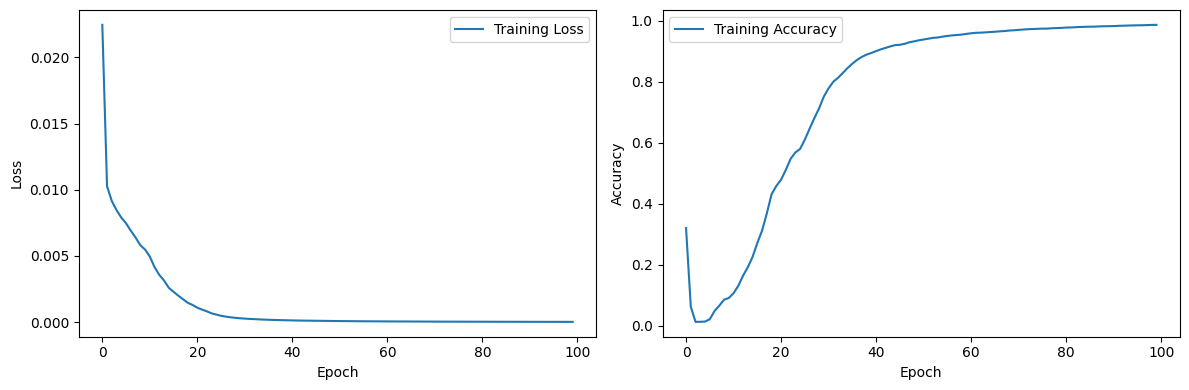

1/1 [==============================] - 2s 2s/step
Accuracy for Class 0: 98.45%
Accuracy for Class 1: 100.00%
Accuracy for Class 2: 100.00%
Accuracy for Class 3: 100.00%


In [180]:
import numpy as np
import cv2
from tensorflow.keras.layers import Activation, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow_examples.models.pix2pix import pix2pix
from tensorflow.keras.callbacks import EarlyStopping


# Updated function to build the CNN model
def build_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(4, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(4, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2DTranspose(4, (3, 3), activation='relu', padding='same', strides=(2, 2)),
        Conv2DTranspose(4, (3, 3), activation='relu', padding='same', strides=(2, 2)),
        Conv2D(num_classes, (3, 3), padding='same'),
        # Activation(pixelwise_softmax)  # Applying custom softmax activation
        Activation('softmax')
    ])

    return model

'''======================================================================================================'''
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

'''======================================================================================================'''
# #####  train_images, train_masks
image_size = (128, 128)
num_classes = 4
# Define input shape and number of classes
# input_shape = (1024, 1024, 3)
input_shape = image_size + (3,)


# Build and compile the corrected model
simple_cnn_model = unet_model(num_classes)
# simple_cnn_model = build_simple_cnn(input_shape, num_classes)


# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,ignore_class=None, name='sparse_categorical_crossentropy')
simple_cnn_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])


def compute_sample_weights(image, mask):
#  0.97882080078125,
#  0.00274658203125,
#  0.0137939453125,
#  0.004638671875
  ''' Compute sample weights for the image given class. '''
  # Compute relative weight of class
  class_weights = tf.constant([0.001, 0.5, 1.0, 3.0])
  class_weights = class_weights/tf.reduce_sum(class_weights)
  # Compute same-shaped Tensor as mask with sample weights per
  # mask element.
  sample_weights = tf.gather(class_weights,indices=tf.cast(mask, tf.int32))

  return  sample_weights

# Resize the data to match the input dimensions of the model
desired_shape = (image_size[1],image_size[0]) # Adjust the shape for resizing
resized_train_images = np.array([cv2.resize(img, desired_shape) for img in train_images])
resized_train_masks = np.array([cv2.resize(mask, desired_shape) for mask in train_masks])

weighted_samples = [ compute_sample_weights(train_images[i],mask) for i,mask in enumerate(resized_train_masks)]
weighted_samples = tf.stack(weighted_samples)
###############################
# Define an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,               # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore model weights to the best epoch
)
###############################

# Training the Model
nbr_train_exp = 10
history = simple_cnn_model.fit(resized_train_images[:nbr_train_exp], resized_train_masks[:nbr_train_exp], sample_weight=weighted_samples[:nbr_train_exp], epochs=100, batch_size=1,
    callbacks=[early_stopping] ) # Pass the EarlyStopping callback
# history = simple_cnn_model.fit(train_batches, epochs=15, batch_size=2 )

# Plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate accuracy per class
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
predictions = simple_cnn_model.predict(resized_train_images)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = resized_train_masks
for i, class_name in enumerate(class_names):
    class_mask = (true_labels == i)
    class_accuracy = np.mean(predicted_labels[class_mask] == true_labels[class_mask])
    print(f"Accuracy for {class_name}: {class_accuracy * 100:.2f}%")

In [181]:
simple_cnn_model.summary()

Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_30 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 model_28 (Functional)       [(None, 64, 64, 96),         1841984   ['input_30[0][0]']            
                              (None, 32, 32, 144),                                                
                              (None, 16, 16, 192),                                                
                              (None, 8, 8, 576),                                                  
                              (None, 4, 4, 320)]                                                  
                                                                                           

# Predicting on Train Data

1/1 [==============================] - 0s 417ms/step
train_predictions (10, 128, 128, 4)
Train Accuracy: 96.33%, IoU: 20.30%
1/1 [==============================] - 0s 438ms/step
Accuracy for Class 0: 97.34%
Accuracy for Class 1: 5.73%
Accuracy for Class 2: 50.07%
Accuracy for Class 3: 67.80%


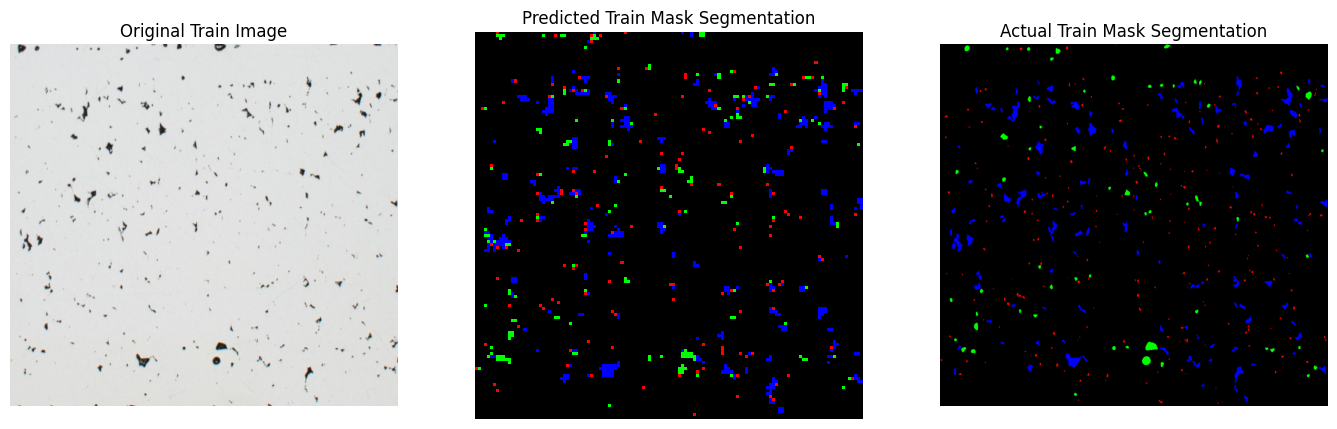

In [182]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import metrics

### train_images, train_masks
# desired_shape = (1060, 992)  # Adjust the shape for resizing
desired_shape = (image_size[1],image_size[0])
resized_train_images = np.array([cv2.resize(img, desired_shape) for img in train_images])

# Predict on the resized train images
train_predictions = simple_cnn_model.predict(resized_train_images)
print('train_predictions', train_predictions.shape)
# # Get the class with the highest probability for each pixel
train_predictions = np.argmax(train_predictions, axis=-1)

# # Reshape predictions to match original image shape
train_predictions = train_predictions.reshape(resized_train_images.shape[0], *resized_train_images.shape[1:3])

# # Resizing the train masks to match the predictions
resized_train_masks = np.array([cv2.resize(mask, desired_shape, interpolation=cv2.INTER_NEAREST) for mask in train_masks])

# # Flattening the predictions and the true masks
flat_predictions = train_predictions.flatten()
flat_true_masks = resized_train_masks.flatten()

# # Calculating the accuracy
accuracy = np.sum(flat_predictions == flat_true_masks) / flat_predictions.size

# # Calculating the intersec over union
m_iou = metrics.IoU(num_classes=4, target_class_ids=[1, 2, 3])
m_iou.update_state(y_true=resized_train_masks, y_pred=train_predictions)
iou = m_iou.result().numpy()

print(f"Train Accuracy: {accuracy * 100:.2f}%, IoU: {iou*100:.2f}%")

# Calculate accuracy per class
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
predictions = simple_cnn_model.predict(resized_train_images)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = resized_train_masks
for i, class_name in enumerate(class_names):
    class_mask = (true_labels == i)
    class_accuracy = np.mean(predicted_labels[class_mask] == true_labels[class_mask])
    print(f"Accuracy for {class_name}: {class_accuracy * 100:.2f}%")

# Plotting Original and Predicted Images
fig, ax = plt.subplots(1, 3, figsize=(17, 6))
ax[0].imshow(train_images[0])
ax[0].set_title("Original Train Image")
ax[0].axis('off')

ax[1].imshow(add_colors(train_predictions[0]))
ax[1].set_title("Predicted Train Mask Segmentation")
ax[1].axis('off')

ax[2].imshow(add_colors(train_masks[0]))
ax[2].set_title("Actual Train Mask Segmentation")
ax[2].axis('off')
plt.show()




In [32]:
uniques, counts = np.unique(resized_test_masks, return_counts=True)
unique_count = {unique:count for unique, count in zip(uniques, counts)}
print('pixel count & % in each class::')
display(unique_count)

unique_count_percent = {unique:count/resized_test_masks.reshape(-1).shape[0] for unique, count in zip(uniques, counts)}
display(unique_count_percent)


NameError: ignored

# Predicting on Test Data

1/1 [==============================] - 0s 70ms/step
Test Accuracy: 95.93%, IoU: 0.08%
1/1 [==============================] - 0s 79ms/step
Accuracy for Class 0: 97.37%
Accuracy for Class 1: 2.78%
Accuracy for Class 2: 20.91%
Accuracy for Class 3: 52.00%


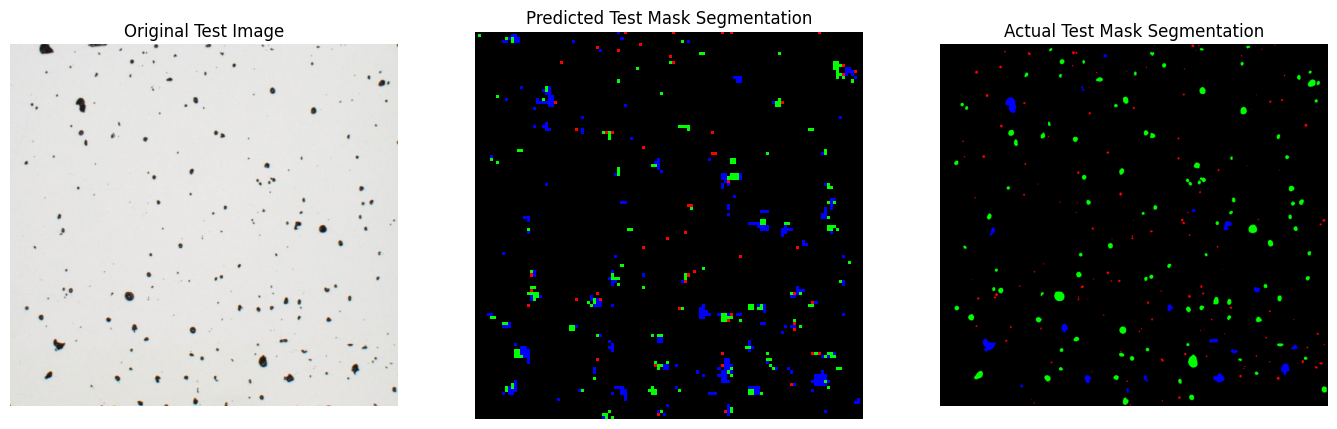

In [183]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import metrics

### test_images, test_masks
# Resize the test images to match the input dimensions of the model
# desired_shape = (1060, 992)  # Adjust the shape for resizing
desired_shape = (image_size[1],image_size[0])
resized_test_images = np.array([cv2.resize(img, desired_shape) for img in test_images])

# Predict on the resized test images
test_predictions = simple_cnn_model.predict(resized_test_images)

# # Get the class with the highest probability for each pixel
test_predictions = np.argmax(test_predictions, axis=-1)

# # Reshape predictions to match original image shape
test_predictions = test_predictions.reshape(resized_test_images.shape[0], *resized_test_images.shape[1:3])

# # Resizing the test masks to match the predictions
resized_test_masks = np.array([cv2.resize(mask, desired_shape, interpolation=cv2.INTER_NEAREST) for mask in test_masks])

# # Flattening the predictions and the true masks
flat_predictions = test_predictions.flatten()
flat_true_masks = resized_test_masks.flatten()

# # Calculating the accuracy
accuracy = np.sum(flat_predictions == flat_true_masks) / flat_predictions.size

# # Calculating the intersec over union
m_iou = metrics.IoU(num_classes=4, target_class_ids=[1, 2, 3])
m_iou.update_state(y_true=resized_test_masks, y_pred=test_predictions)
iou = m_iou.result().numpy()

print(f"Test Accuracy: {accuracy * 100:.2f}%, IoU: {iou:.2f}%")

# Calculate accuracy per class
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
predictions = simple_cnn_model.predict(resized_test_images)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = resized_test_masks
for i, class_name in enumerate(class_names):
    class_mask = (true_labels == i)
    class_accuracy = np.mean(predicted_labels[class_mask] == true_labels[class_mask])
    print(f"Accuracy for {class_name}: {class_accuracy * 100:.2f}%")

# Plotting Original and Predicted Images
fig, ax = plt.subplots(1, 3, figsize=(17, 6))
ax[0].imshow(test_images[0])
ax[0].set_title("Original Test Image")
ax[0].axis('off')

ax[1].imshow(add_colors(test_predictions[0]))
ax[1].set_title("Predicted Test Mask Segmentation")
ax[1].axis('off')

ax[2].imshow(add_colors(test_masks[0]))
ax[2].set_title("Actual Test Mask Segmentation")
ax[2].axis('off')
plt.show()



In [184]:
print("Shape of train_images:", train_images.shape)
print("Shape of train_masks_reshaped:", train_masks.shape)

# Print model summary
simple_cnn_model.summary()


Shape of train_images: (10, 990, 1060, 3)
Shape of train_masks_reshaped: (10, 990, 1060)
Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_30 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 model_28 (Functional)       [(None, 64, 64, 96),         1841984   ['input_30[0][0]']            
                              (None, 32, 32, 144),                                                
                              (None, 16, 16, 192),                                                
                              (None, 8, 8, 576),                                                  
                              (None, 4, 4, 320)]                                                  
  

# the following code to download the results and check the colors of the masks

In [ ]:
from google.colab import files
!zip -r /content/data.zip /content/data
files.download('/content/data.zip')


  adding: content/data/ (stored 0%)
  adding: content/data/train/ (stored 0%)
  adding: content/data/train/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/train/image1.JPG (deflated 1%)
  adding: content/data/test_mask/ (stored 0%)
  adding: content/data/test_mask/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/test_mask/test_mask.JPG (deflated 12%)
  adding: content/data/test/ (stored 0%)
  adding: content/data/test/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/test/test_image.JPG (deflated 4%)
  adding: content/data/masks/ (stored 0%)
  adding: content/data/masks/mask1.JPG (deflated 3%)
  adding: content/data/masks/.ipynb_checkpoints/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# img_temp = Image.open(image_path)
from PIL import Image
import numpy as np
import cv2
img_temp = Image.open('/content/data/masks/mask2.JPG')
np.unique(np.array(img_temp))

array([  0, 255], dtype=uint8)

In [ ]:
# image = cv2.imread(image_path)
image = cv2.imread(('/content/data/masks/mask2.JPG'))
np.unique(image)

array([  0, 255], dtype=uint8)

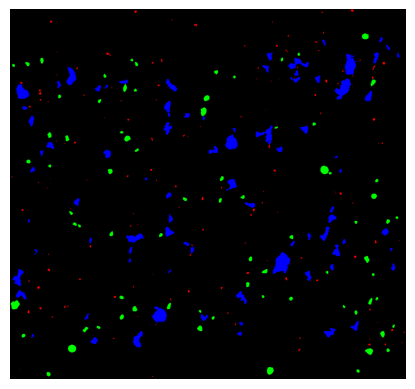

Image Information:
Height: 990
Width: 1060
Channels: 3
Pixel Values in ROI:
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0]
 [0 0 0]
 [0 0

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = '/content/data/masks/mask2.JPG'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Get image dimensions (height, width, number of channels)
    height, width, channels = image.shape

    print("Image Information:")
    print("Height:", height)
    print("Width:", width)
    print("Channels:", channels)

    # Choose a region of interest (ROI) within the image
    # Define the coordinates of the top-left and bottom-right corners of the ROI
    roi_top_left = (100, 100)  # Replace with your desired coordinates
    roi_bottom_right = (200, 200)

    # Extract the ROI from the image
    roi = image[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]

    # Print pixel values of the ROI
    print("Pixel Values in ROI:")
    for row in roi:
        print(row)

# Ploting the over all accuracy with icreasing the training images (UNET)

[1.772, 2.505, 2.575, 1.226, 1.342, 1.69, 1.521, 1.025, 1.079, 0.985]


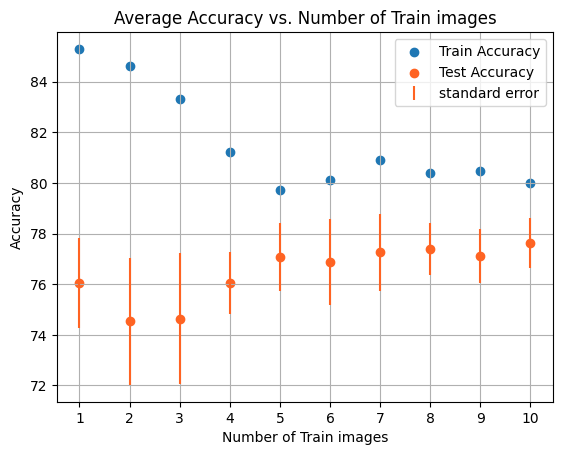

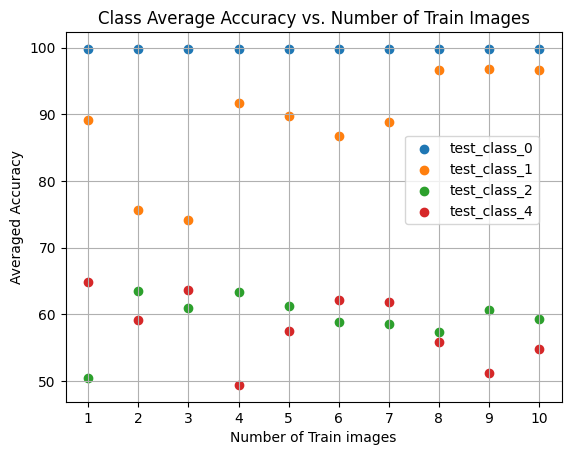

In [186]:
import matplotlib.pyplot as plt
train_images = [1,2,3,4,5, 6, 7 , 8, 9, 10]


train_accuracy_list_5images = [ 43.05,55.5425 , , , , , , , , ]
test_accuracy_list_1image =[31.9475 ,44.5625 , , , , , , , , ]

IoU_test_accuracy_list_1image =[ , , , , , , , , , ]
IoU_test_accuracy_list_1image_new = []
for i in IoU_test_accuracy_list_1image:
  IoU_test_accuracy_list_1image_new.append(round(i/(np.sqrt(10)),3))
print(IoU_test_accuracy_list_1image_new)

IoU_test_accuracy = [0.01 , , , , , , , , , ]


f1 = plt.figure(1)
plt.scatter(train_images, train_accuracy_list_5images, label='Train Accuracy', marker='o')
plt.scatter(train_images, test_accuracy_list_1image, label='Test Accuracy', marker='o', color='#FF6322')
plt.errorbar(train_images, test_accuracy_list_1image,standard_error_test_accuracy, label='standard error', linestyle='None', color='#FF6322')
plt.xlabel('Number of Train images')
plt.xticks( train_images)  ##plt.xticks(x, labels)

plt.ylabel('Accuracy')
plt.title('Average Accuracy vs. Number of Train images')
plt.legend(loc='upper right')
plt.grid(True)

###########################

train_class_0 = [24.12 , 91.40, , , , , , , , ]
train_class_1 = [7.14 , 4.35 , , , , , , , , ]
train_class_2 = [48.82 , 47.29, , , , , , , , ]
train_class_3 = [ 92.12,79.13 , , , , , , , , ]


test_class_0 = [25.37 ,94.56 , , , , , , , , ]
test_class_1 = [ 2.78, , , , , , , , , ]
test_class_2 = [ , , , , , , , , , ]
test_class_3 = [ , , , , , , , , , ]


IoU_test_class_0 = [ , , , , , , , , , ]
IoU_test_class_1 = [ , , , , , , , , , ]
IoU_test_class_2 = [3.64, , , , , , , , , ]
IoU_test_class_3 = [96.00, , , , , , , , , ]


f3 = plt.figure(2)


plt.scatter(train_images, test_class_0, label='test_class_0', marker='o')
plt.scatter(train_images, test_class_1, label='test_class_1', marker='o')
plt.scatter(train_images, test_class_2, label='test_class_2', marker='o')
plt.scatter(train_images, test_class_3, label='test_class_4', marker='o')


plt.xlabel('Number of Train images')
plt.xticks( train_images)  ## plt.xticks(x, labels)

plt.ylabel('Averaged Accuracy')
plt.title('Class Average Accuracy vs. Number of Train Images')
plt.legend(loc='center left', bbox_to_anchor=(0.67, 0.6))
plt.grid(True)
plt.show()

